## **Aim:** Predict using Decision Tree Classifier and visualize the result.

<br>

> #### **By:** Siddharth Kulkarni
> #### **Technique used:** Supervised ML: Decision Tree Classifier
> #### **Language used:** Python
> #### **Dataset:** https://bit.ly/3kXTdox (Iris)

## Loading Libraries & Importing Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
!pip install dtreeviz
!apt-get install graphviz
from dtreeviz.trees import dtreeviz 

     |████████████████████████████████| 62 kB 403 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67923 sha256=c97a9ebbe42d1a2aa369384bc8cf15fabdeb4fdef6d8faaebd755eed472a6367
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.18.1 which is incompatible.



graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [2]:
data = pd.read_csv("../input/iris-dataset/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dataset Information
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


> **We observe there are total 6 features out of which Species is the Target Variable.**

In [4]:
# Data Stats
data.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing

In [5]:
# Checking for missing records
data.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> **There are no missing values in the dataset**

## Exploratory Data Analysis

### Histograms

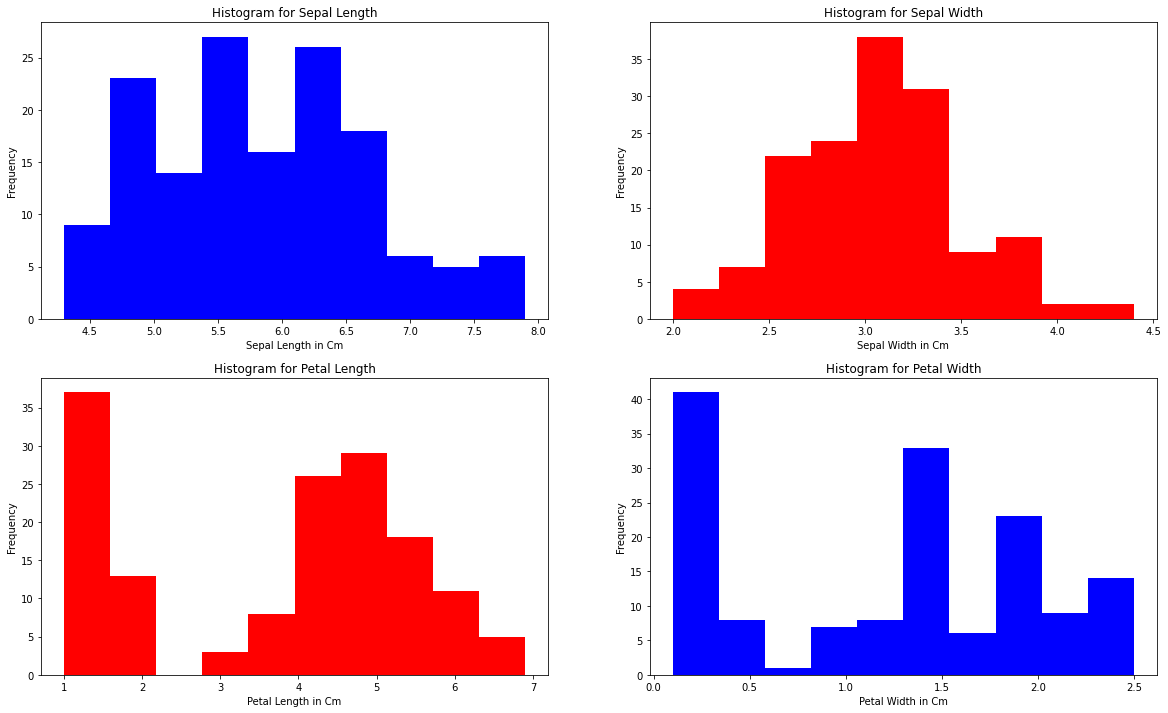

In [6]:
plt.figure(figsize=(20, 12))

plt.subplot(221) 
plt.hist(data['SepalLengthCm'],color = 'blue')
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Sepal Length')

plt.subplot(222) 
plt.hist(data['SepalWidthCm'],color = 'red')
plt.xlabel('Sepal Width in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Sepal Width')

plt.subplot(223) 
plt.hist(data['PetalLengthCm'],color = 'red')
plt.xlabel('Petal Length in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Petal Length')

plt.subplot(224) 
plt.hist(data['PetalWidthCm'],color = 'blue')
plt.xlabel('Petal Width in Cm')
plt.ylabel('Frequency')
plt.title('Histogram for Petal Width')

plt.show()

> **We observe that Sepal Width feature is Normally Distributed**

### Pair Plot (Bivariate Analysis)

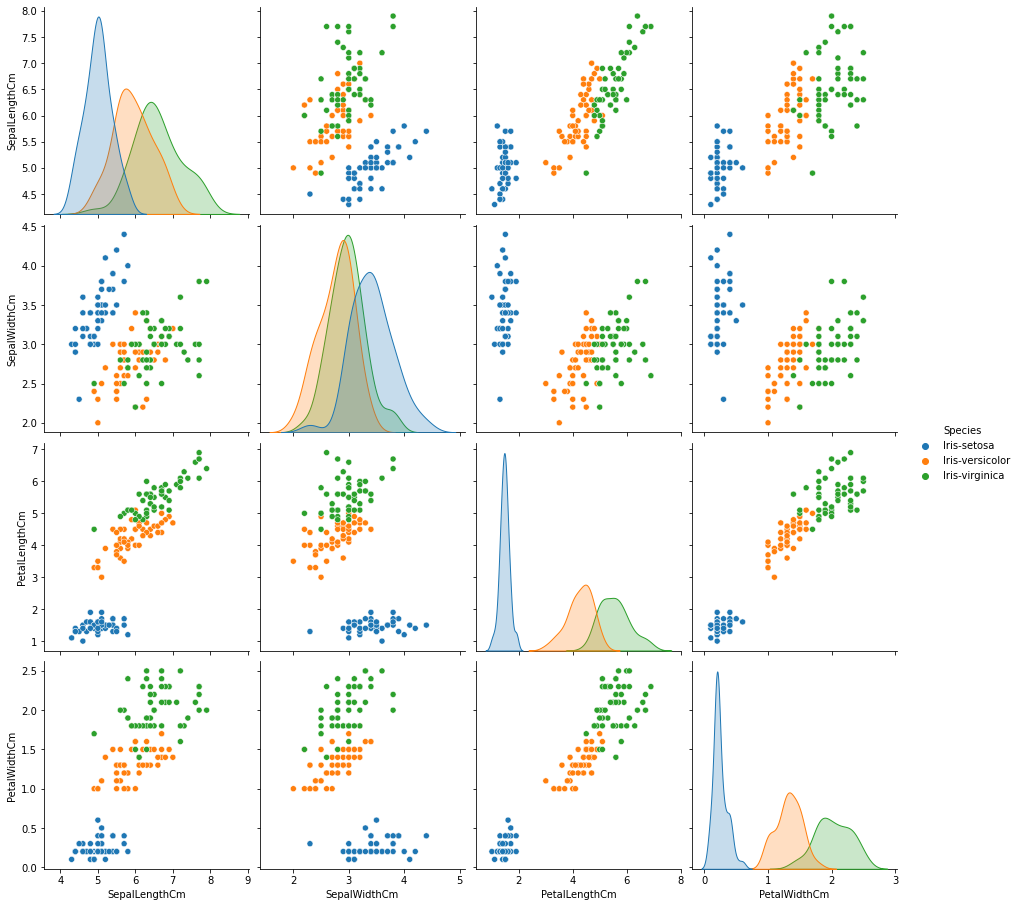

In [7]:
sns.pairplot(data.drop(columns = ['Id']), hue="Species", size=3.2)

In [8]:
print("\nTypes of species:")
data['Species'].unique()


Types of species:


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

> **The target feature: Species has 3 levels of categories 'Iris-setosa', 'Iris-versicolor' & 'Iris-virginica'**

### Scatter Plots 

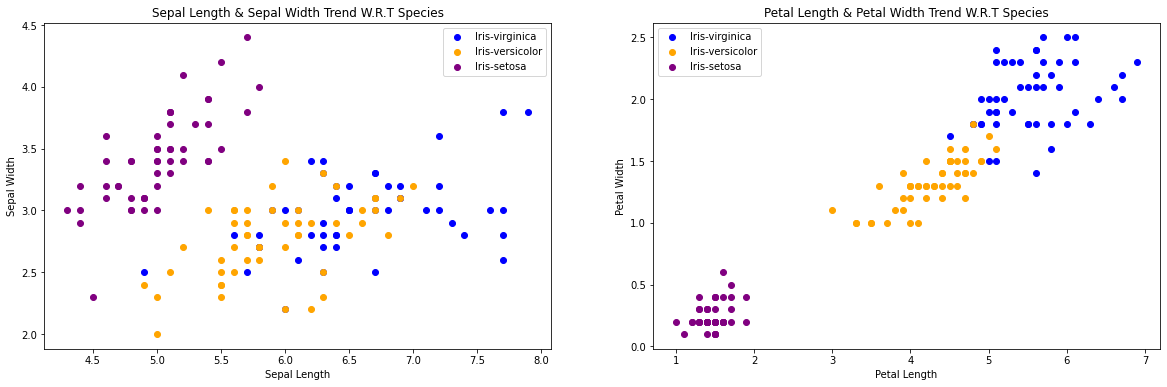

In [9]:
plt.figure(figsize=(20,6))

colors = ['blue','orange','purple']
species = ['Iris-virginica','Iris-versicolor', 'Iris-setosa']

plt.subplot(121) 

for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label = species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width Trend W.R.T Species')
plt.legend()

plt.subplot(122) 

for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label = species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length & Petal Width Trend W.R.T Species')
plt.legend()

> **Sepal Length & Sepal Width have more overlappings whereas Petal Length & Petal Width have very few overlappings**

### Co-relation Matrix

<AxesSubplot:>

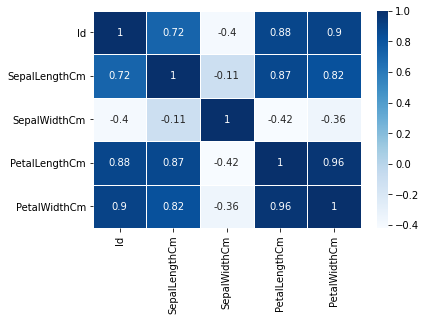

In [10]:
corr = data.corr()
fig,axis = plt.subplots(figsize = (6,4))
sns.heatmap(corr,annot = True, ax = axis,linewidths=.5,cmap="Blues")

> ##### **We Observe that the boxes with dark color are more corelated (Petal Width - Petal length)**

## Label Encoding Categorical Data

In [11]:
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])

## Feature Selection

In [12]:
# Dropping id due to uniqueness
data = data.drop(columns = ['Id']) 
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting the Data

In [13]:
x = data.drop(columns = ['Species'])
y = data['Species']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

## Decision Tree Classifier with Metrics Evaluation

---------- At Max Depth 3 ----------


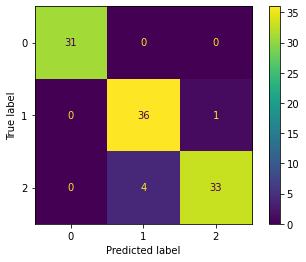

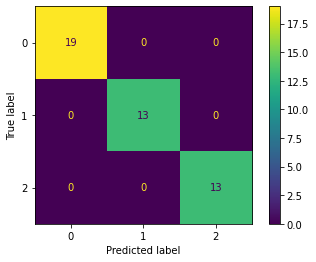

---------- At Max Depth 4 ----------


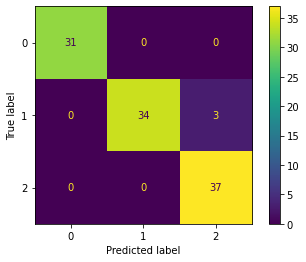

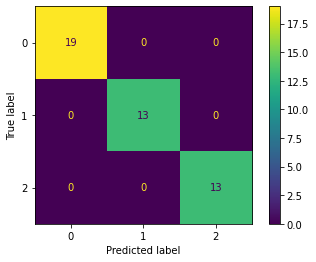

---------- At Max Depth 5 ----------


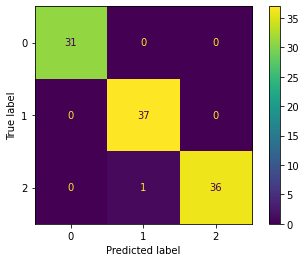

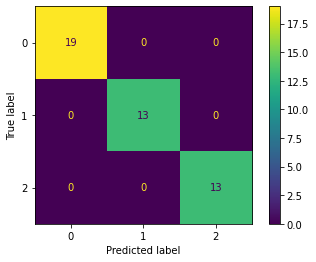

In [14]:
depth = [3,4,5]
for i in depth:
    dt_model = DecisionTreeClassifier(max_depth = i,random_state=48)
    model = dt_model.fit(X_train,Y_train)
    print("---------- At Max Depth {} ----------".format(i))
    plot_confusion_matrix(dt_model,X_train,Y_train)
    plt.show()
    plot_confusion_matrix(dt_model,X_test,Y_test)  
    plt.show()

> **We Observe at max_depth = 5, Training Data's Confusion Matrix has only 1 miss classified record whereas Test Data's Confusion Matrix has no missclassified records.**

> **Hence we take max depth = 5**

## Metrics Evalution

![Confusion Matrix](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

In [15]:
# Predicting yp_train and yp_test
yp_train = dt_model.predict(X_train)
yp_test = dt_model.predict(X_test)

In [16]:
# Accuracy
print("Accuracy on Train Data is: {}".format(accuracy_score(Y_train,yp_train)))
print("Accuracy on Test Data is: {}\n".format(accuracy_score(Y_test,yp_test)))

# Precision
print("Precision on Train Data is: {}".format(precision_score(Y_train,yp_train,average = "weighted")))
print("Precision on Test Data is: {}\n".format(precision_score(Y_test,yp_test,average = "weighted")))

# Recall 
print("Recall on Train Data is: {}".format(recall_score(Y_train,yp_train,average = "weighted")))
print("Recall on Test Data is: {}".format(recall_score(Y_test,yp_test,average = "weighted")))

Accuracy on Train Data is: 0.9904761904761905
Accuracy on Test Data is: 1.0

Precision on Train Data is: 0.9907268170426066
Precision on Test Data is: 1.0

Recall on Train Data is: 0.9904761904761905
Recall on Test Data is: 1.0


### Visualizing DT Graphically 

In [17]:
#from IPython.core.display import display, HTML
#style = "<style>svg{width:80% !important;height:50% !important;}</style>"

In [18]:
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
graph = dtreeviz(dt_model,X_train,Y_train,
                 target_name="Species",
                 feature_names=fn,
                 class_names=list(['Iris-setosa','Iris-versicolor','Iris-virginica']))
#graph

![](https://raw.githubusercontent.com/mykeysid10/LGMVIP-DataScience/main/Prediction%20Using%20Decision%20Tree/Output%20Tree.JPG?token=AQ3OOQ2LTS7K3GB36HRUE73BTNAEM)

> **This is graphical visual for the Decision Tree Clasifier.**

> **Gini Index is used by the Classifier for the best splitting of nodes.**

> **As we kept Max_depth = 5, we observe the Tree has build upto depth 5.**

## Conclusion
> #### Used Decision Tree Classifier and Visualized it Graphically with Accuracy of classifier as : 99.04%